In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing data files

merged_data_df = pd.read_csv("Resources/merged_output.csv")
merged_data_df.head()

C:\Users\Uzma\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10,13,14,15,16,28,29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Address,CO 1st Max Hour,CO 1st Max Value,CO AQI,CO Mean,CO Units,City,County,County Code,...,SO2 1st Max Hour,SO2 1st Max Value,SO2 AQI,SO2 Mean,SO2 Units,Site Num,State,State Code,Unnamed: 0.1,Year
0,0,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3516.0,2006.0
1,1,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,9.0,2.0,3.0,0.636364,Parts per billion,2.0,California,6.0,3517.0,2006.0
2,2,2956-A TREAT BOULEVARD,4.0,1.3,0.0,0.556522,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3518.0,2006.0
3,3,2956-A TREAT BOULEVARD,6.0,0.8,9.0,0.572222,Parts per million,Concord,Alameda,6001.0,...,11.0,2.0,0.0,0.600000,Parts per billion,2.0,California,6.0,3519.0,2006.0
4,4,2956-A TREAT BOULEVARD,21.0,1.1,0.0,0.578261,Parts per million,Concord,Alameda,6001.0,...,5.0,2.0,3.0,1.000000,Parts per billion,2.0,California,6.0,3520.0,2006.0


In [82]:
sample_df = merged_data_df.sample(n = 20)
sample_df.head()

,Unnamed: 0,Address,CO 1st Max Hour,CO 1st Max Value,CO AQI,CO Mean,CO Units,City,County,County Code,...,SO2 1st Max Hour,SO2 1st Max Value,SO2 AQI,SO2 Mean,SO2 Units,Site Num,State,State Code,Unnamed: 0.1,Year
223542,223542,"1029 ETHEL ST, CALEXICO HIGH SCHOOL",23.0,1.8,20.0,1.029167,Parts per million,Calexico,Imperial,25.0,...,20.0,3.3,0.0,2.733333,Parts per billion,5.0,California,6.0,13284.0,0.0
182135,182135,2956-A TREAT BOULEVARD,0.0,0.4,5.0,0.383333,Parts per million,Concord,Contra Costa,13.0,...,17.0,2.0,3.0,0.818182,Parts per billion,2.0,California,6.0,6303.0,0.0
22599,22599,"1100 PASEO INTERNATIONAL, OTAY MESA, CA",0.0,0.2,2.0,0.166667,Parts per million,San Diego,San Diego,73.0,...,2.0,2.0,0.0,2.000000,Parts per billion,2007.0,California,6.0,26115.0,0.0
331438,331438,2956-A TREAT BOULEVARD,19.0,0.6,0.0,0.400000,Parts per million,Concord,Contra Costa,13.0,...,14.0,1.3,0.0,0.500000,Parts per billion,2.0,California,6.0,9448.0,0.0
261482,261482,"1630 N MAIN ST, LOS ANGELES",7.0,0.5,0.0,0.200000,Parts per million,Los Angeles,Los Angeles,37.0,...,10.0,2.0,3.0,1.304348,Parts per billion,1103.0,California,6.0,17587.0,0.0


#### Independent T-Tests
#### Independent t-tests will compare the means of 2 independent populations.

#### Assumptions
#### Data is normally distributed
#### Data is independent
#### Data is homogenous (The standard deviations are roughly equal)

#### First Test: The mean of pollutant CO is the same as mean of pollutant SO2

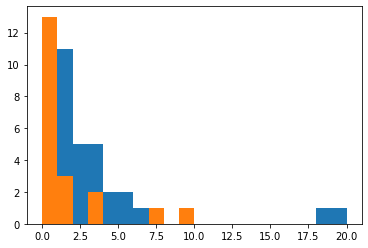

In [86]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np


co_aqi = list(sample_df['CO AQI'])
so2_aqi = list(sample_df['SO2 AQI'])
  
# generating two series of random 
# values using numpy random module 
# of shape (500,1)
co_aqi = list(sample_df['CO AQI'])
so2_aqi = list(sample_df['SO2 AQI'])
  
# plotting first histogram
plt.hist(co_aqi)
  
# plotting second histogram
plt.hist(so2_aqi)
  
# Showing the plot using plt.show()
plt.show()

In [87]:
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
st.ttest_ind(co_aqi, so2_aqi, equal_var=False)

Ttest_indResult(statistic=1.0592839965175893, pvalue=0.2977184190716645)

#### p_value > 0.05, so we accept the null Hypothesis, that the two pollutants means are same

#### Second Test: ANOVA 

#### The problem: How do we know if any of the 4 pollutants means are statistically significant?

#### The solution: ANOVA - are any of the pollutants means significantly different than the rest?

In [91]:
sample_df = merged_data_df.sample(n = 10)
sample_df.head()

,Unnamed: 0,Address,CO 1st Max Hour,CO 1st Max Value,CO AQI,CO Mean,CO Units,City,County,County Code,...,SO2 1st Max Hour,SO2 1st Max Value,SO2 AQI,SO2 Mean,SO2 Units,Site Num,State,State Code,Unnamed: 0.1,Year
366871,366871,2956-A TREAT BOULEVARD,7.0,0.4,5.0,0.291667,Parts per million,Concord,Contra Costa,13.0,...,14.0,4.3,0.0,1.033333,Parts per billion,2.0,California,6.0,13637.0,0.0
342874,342874,"2850 MESA VERDE DR EAST, COSTA MESA",8.0,1.9,0.0,0.878261,Parts per million,Costa Mesa,Orange,59.0,...,8.0,3.0,4.0,2.043478,Parts per billion,1003.0,California,6.0,20884.0,0.0
284478,284478,Center St,0.0,0.3,0.0,0.300000,Parts per million,Davenport,Santa Cruz,87.0,...,0.0,1.0,1.0,1.000000,Parts per billion,3.0,California,6.0,40583.0,0.0
50852,50852,"2850 MESA VERDE DR EAST, COSTA MESA",6.0,2.0,0.0,0.682609,Parts per million,Costa Mesa,Orange,59.0,...,11.0,3.6,0.0,2.885714,Parts per billion,1003.0,California,6.0,19692.0,0.0
157042,157042,"1630 N MAIN ST, LOS ANGELES",11.0,0.4,0.0,0.313043,Parts per million,Los Angeles,Los Angeles,37.0,...,5.0,2.0,3.0,1.260870,Parts per billion,1103.0,California,6.0,12807.0,0.0


In [92]:
# Converting into list for plotting

co_aqi = list(sample_df['CO AQI'])
no2_aqi = list(sample_df['NO2 AQI'])
so2_aqi = list(sample_df['SO2 AQI'])
o3_aqi = list(sample_df['O3 AQI'])

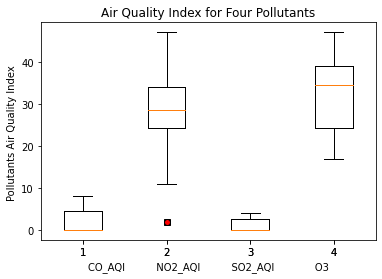

In [93]:
four_dataset = [co_aqi, no2_aqi, so2_aqi, o3_aqi]

red_square = dict(markerfacecolor='r', marker='s')

fig, ax = plt.subplots()
ax.set_title('Air Quality Index for Four Pollutants')
ax.set_xlabel('CO_AQI          NO2_AQI          SO2_AQI             O3')
ax.set_ylabel('Pollutants Air Quality Index ')
ax.boxplot(four_dataset, flierprops=red_square)
ax.boxplot(four_dataset)
plt.show()

In [94]:
# Perform the ANOVA
st.f_oneway(co_aqi, no2_aqi, so2_aqi, o3_aqi)

F_onewayResult(statistic=38.19714945457441, pvalue=2.794079189812727e-11)

#### p_value > 0.05, so we accept the null hypothesis that all the pollutants have the same mean values for all pollutants